<a href="https://colab.research.google.com/github/Merlinvensiya/Naan-Mudhalvan/blob/main/product_demand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import os
for dirname, _, filenames in os.walk('/content/PoductDemand.csv.zip'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix ,classification_report
from sklearn.ensemble import RandomForestClassifier

In [ ]:
data  = pd.read_csv("/content/PoductDemand.csv.zip")

In [ ]:
for ind in data.index:
    continue

In [ ]:
def remove_space_between_word(dataset):
    for col in dataset.columns:
        for i in range(len(dataset[col])):
            if (type(dataset[col][i]) == str ):
                dataset[col][i] = dataset[col][i].strip()
                dataset[col][i] = dataset[col][i].replace(" ", "_")
    return data

In [ ]:
new_df = remove_space_between_word(data)
new_df.head()

,ID,Store ID,Total Price,Base Price,Units Sold
0,1,8091,99.0375,111.8625,20
1,2,8091,99.0375,99.0375,28
2,3,8091,133.9500,133.9500,19
3,4,8091,133.9500,133.9500,44
4,5,8091,141.0750,141.0750,52


In [ ]:
new_df.shape

(150150, 5)

Text(0.5, 0, 'UNITS SOLD')

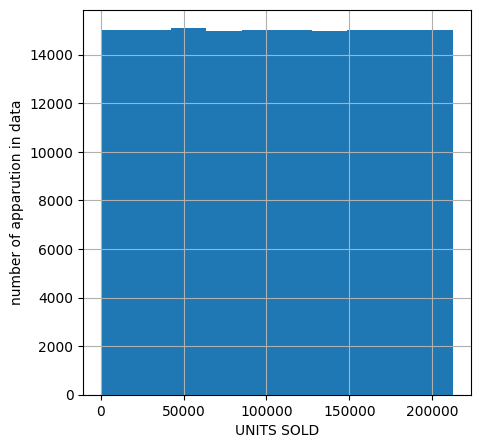

In [ ]:
fig = plt.figure(figsize=(5, 5))
ax = fig.gca()
data["ID"].hist(ax =ax)
plt.ylabel("number of apparution in data")
plt.xlabel("UNITS SOLD")

array([[<Axes: title={'center': 'ID'}>,
        <Axes: title={'center': 'Store ID'}>],
       [<Axes: title={'center': 'Total Price'}>,
        <Axes: title={'center': 'Base Price'}>],
       [<Axes: title={'center': 'Units Sold'}>, <Axes: >]], dtype=object)

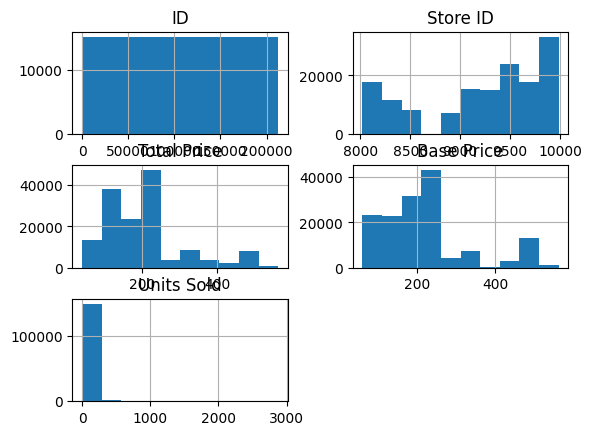

In [ ]:
new_df.hist()

In [ ]:
def encode_data(dataset , data_dict_weigth):
    cols = dataset.columns
    for columnName in cols:
        for i in range(len(dataset[columnName])):
            try:
            #print(data_dict[data2[columnName][i]]["weight"])
                dataset[columnName][i] = data_dict[dataset[columnName][i]]["weight"]
            except:
                pass
    dataset = dataset.fillna(0) # put empty cell to 0
    dataset = dataset.replace("Store ID" , 5)
    dataset = dataset.replace("Total Price" , 6)
    dataset = dataset.replace("Base price" , 6)
    return dataset

In [ ]:
data_dict = new_df.set_index('ID').T.to_dict()

In [ ]:
df = encode_data(new_df , data_dict)
df.head()

,ID,Store ID,Total Price,Base Price,Units Sold
0,1,8091,99.0375,111.8625,20
1,2,8091,99.0375,99.0375,28
2,3,8091,133.9500,133.9500,19
3,4,8091,133.9500,133.9500,44
4,5,8091,141.0750,141.0750,52


In [ ]:
new_df_data = df.drop('ID' , axis =1)
label = data["ID"]

In [ ]:
import plotly.express as px

In [ ]:
from sklearn.model_selection import train_test_split

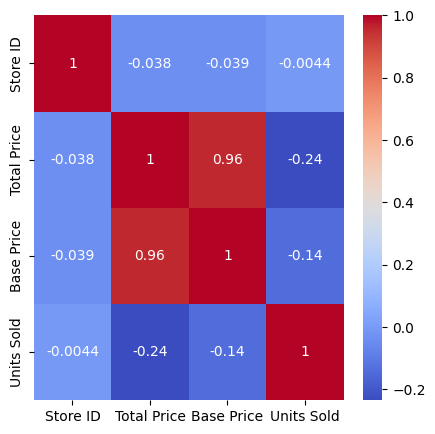

In [ ]:
import seaborn as sns
correlations = new_df_data.corr(method='pearson')
plt.figure(figsize=(5, 5))
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, make_scorer

from plotly.offline import iplot
import plotly as py
import plotly.tools as tls

import pickle


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(new_df_data, label, shuffle=True, train_size = 0.70 )

In [ ]:
def fit_eval_model(model, train_features, y_train, test_features, y_test):

    """
    Function: train and evaluate a machine learning classifier.
    Args:
      model: machine learning classifier
      train_features: train data extracted features
      y_train: train data lables
      test_features: train data extracted features
      y_test: train data lables
    Return:
      results(dictionary): a dictionary of classification report
    """
    results = {}

    # Train the model
    model.fit(train_features, y_train)

    # Test the model
    train_predicted = model.predict(train_features)
    test_predicted = model.predict(test_features)

     # Classification report and Confusion Matrix
    results['classification_report'] = classification_report(y_test, test_predicted)
    results['confusion_matrix'] = confusion_matrix(y_test, test_predicted)

    return results

In [ ]:
rf = RandomForestClassifier(random_state = 1)
ab = AdaBoostClassifier(random_state = 1)
gb = GradientBoostingClassifier(random_state = 1)


# Fit and evaluate models
results = {}
for cls in [ rf, ab, gb]:
    cls_name = cls.__class__.__name__
    results[cls_name] = {}
    results[cls_name] = fit_eval_model(cls, X_train, y_train, X_test, y_test)

In [ ]:
for result in results:
    print (result)
    print()
    for i in results[result]:
        print (i, ':')
        print(results[result][i])
        print()
    print ('-----')
    print()